Factor analysis is one of the unsupervised machine learning algorithms which is used for dimensionality reduction. This algorithm creates factors from the observed variables to represent the common variance i.e. variance due to correlation among the observed variables.

In [1]:
!pip install factor_analyzer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from factor_analyzer import FactorAnalyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 40.7 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42486 sha256=a8d5bfd632f5460c7b94fb9bb403e88ccf0e886d6c5554b90a95de92f19cfb5e
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 4.0.0
    Uninstalling platformdirs-4.0.0:
      Successfully un

In [2]:
from google.colab import files
uploaded = files.upload()

Saving varimax rotation.xlsx to varimax rotation.xlsx


In [3]:
import io
df = pd.read_excel(io.BytesIO(uploaded['varimax rotation.xlsx']))
df.head()

,Product_id,Price,Sale,Weight,Resolution,PPI,CPU Core,CPU Freq,Internal Memory,RAM,Rear Camera,Front Camera,Battery,Thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [4]:
## Check the data type
df.dtypes

Product_id           int64
Price                int64
Sale                 int64
Weight             float64
Resolution         float64
PPI                  int64
CPU Core             int64
CPU Freq           float64
Internal Memory    float64
RAM                float64
Rear Camera        float64
Front Camera       float64
Battery              int64
Thickness          float64
dtype: object

In [5]:
## Check missing value
df.isna().sum()

Product_id         0
Price              0
Sale               0
Weight             0
Resolution         0
PPI                0
CPU Core           0
CPU Freq           0
Internal Memory    0
RAM                0
Rear Camera        0
Front Camera       0
Battery            0
Thickness          0
dtype: int64

Exploratory Data

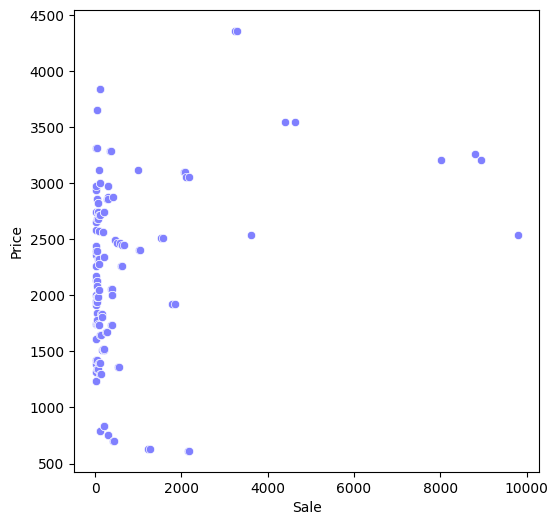

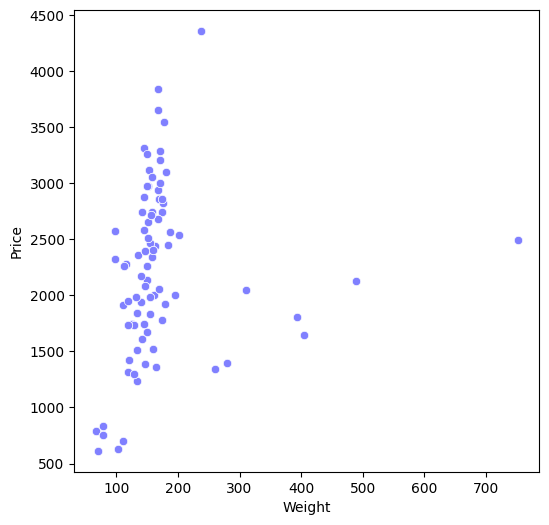

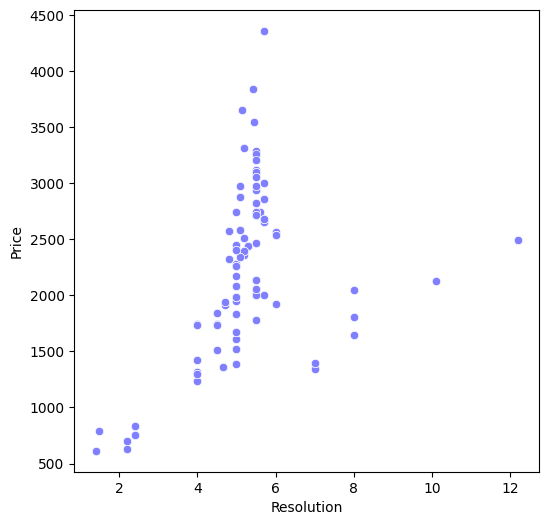

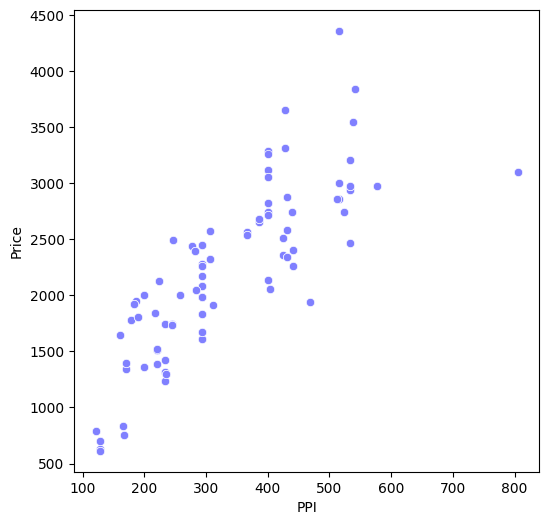

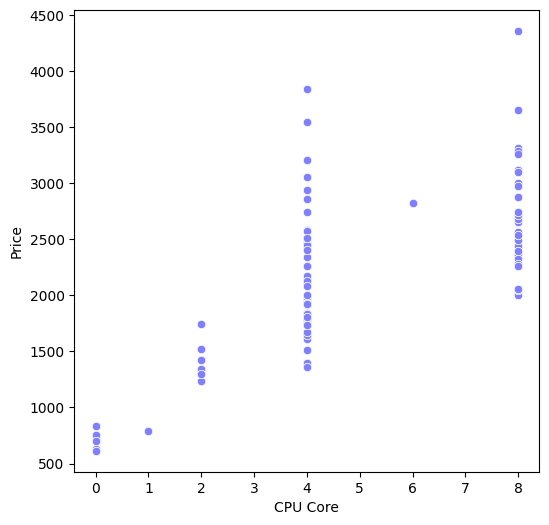

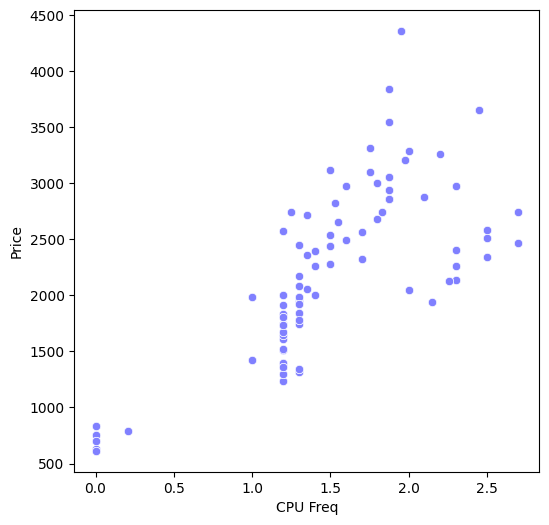

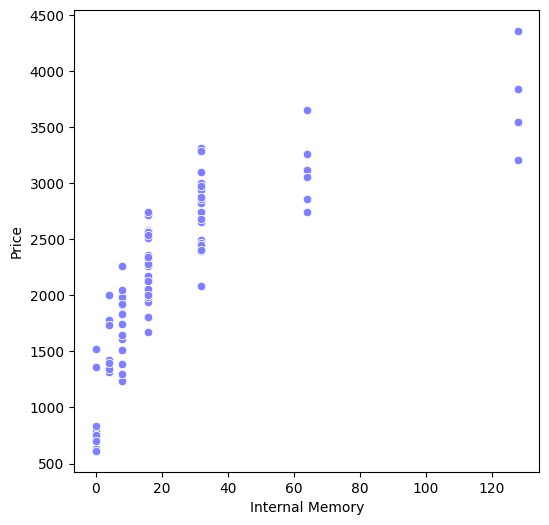

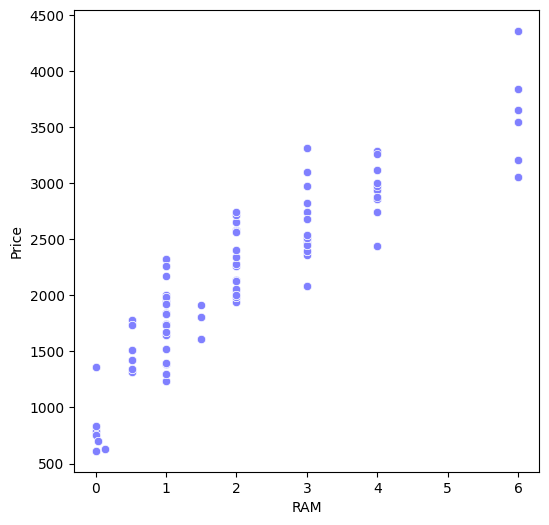

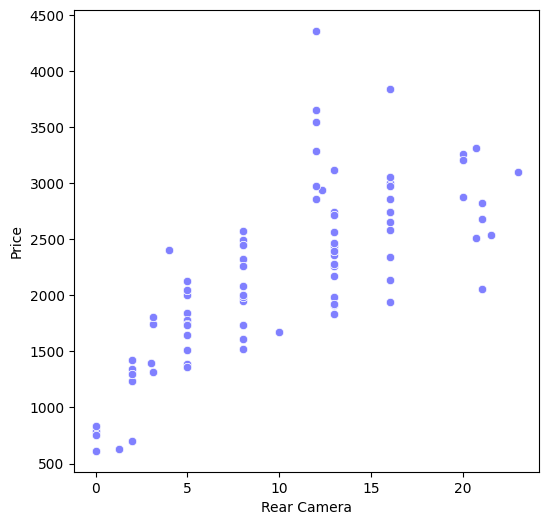

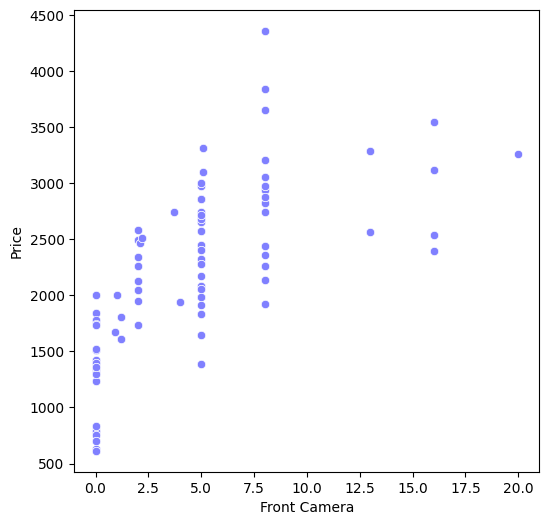

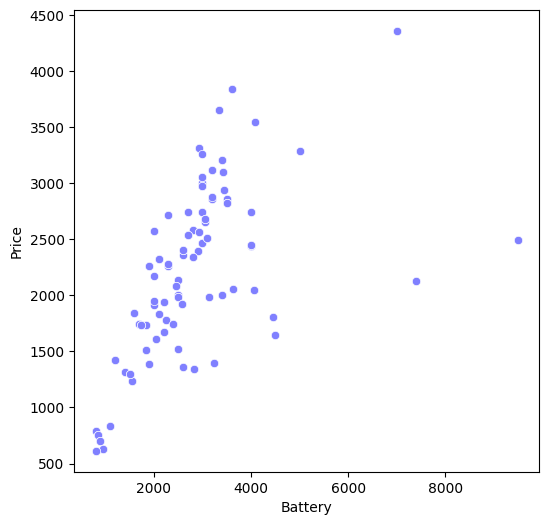

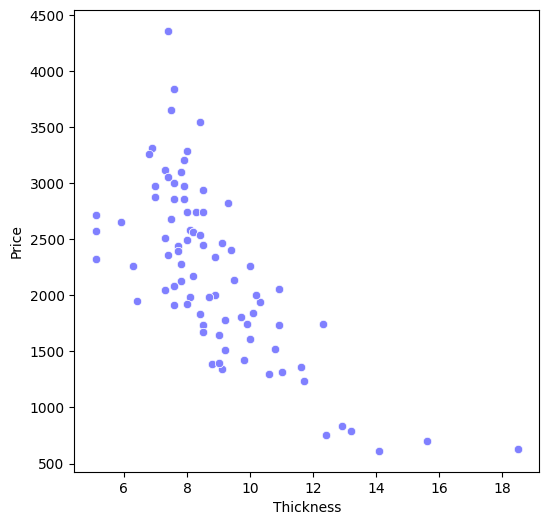

In [6]:
y = df['Price']
df1 = df.drop(['Price', 'Product_id'], axis=1)

num_cols = [col for col in df1.columns if df1[col].dtype in ['int64','float64']]

for idx, col in enumerate(num_cols):
    plt.figure(idx, figsize=(6,6))
    sns.scatterplot(x=col, y=y, data=df1, c="#8080ff")
    plt.show

Drop Price and Product_id from data frame because we don't need the variables in our analysis. But before we drop the variables, we want to check the scatterplot of Price and other variables. Then we built the new data frame

Assumptions

In [8]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, chi2
p = calculate_bartlett_sphericity(df1)
print("Chi squared value : ", chi2)
print("p value : ",p)

Chi squared value :  <scipy.stats._continuous_distns.chi2_gen object at 0x7d9401193010>
p value :  (1964.2064297966506, 0.0)


The Bartlett's test value obtained is 1964.21 with a p-value of 0.000 (p-value < α = 0.05). So, it can be concluded that the data can be used for factor analysis.

In [9]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model = calculate_kmo(df1)
print(kmo_model)

0.766872446962168


The overall KMO value is > 0.5. It means the correlation matrix (in the Correlation row) is not an identity matrix and the data sample used can represent the sample.

In [ ]:
# normalizing features
X_norm = (df1 - df1.mean(axis=0))/df1.std(axis=0)

We normalize our data because our data have different scales

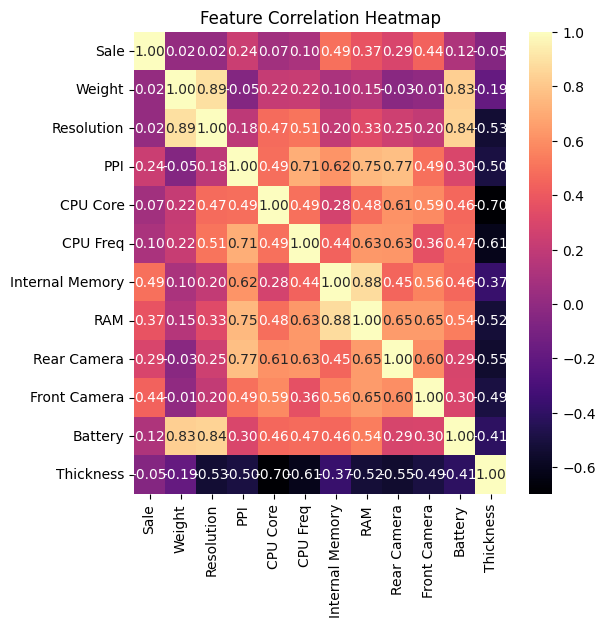

In [11]:
# create covariance matrix
corr_matrix = np.corrcoef(X_norm.T)

# create heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, cmap='magma', annot=True, fmt='.2f',
            xticklabels=df1[num_cols].columns, yticklabels=df1[num_cols].columns)

# set plot title
plt.title('Feature Correlation Heatmap')

# show plot
plt.show()

The heat map above shows the relationship between variables. None of the correlation values above exceed 0.9, it means that there are no variables highly correlate each other.

Factor Analysis

In [14]:
# variance among numerircal features
var= df1[num_cols].var()

# create DataFrame from variance values
var_df = pd.DataFrame({'Variance': var})

# print Variance DataFrame
var_df

,Variance
Sale,2.392029e+06
Weight,8.628294e+03
Resolution,2.279958e+00
PPI,1.817823e+04
CPU Core,5.973214e+00
CPU Freq,3.597393e-01
Internal Memory,8.297149e+02
RAM,2.591557e+00
Rear Camera,3.821199e+01
Front Camera,1.885343e+01


The coefficient of variance value for each variable above shows that most of the variable values are > 35% (CV > 35%) so it can be concluded that there is a high level of heterogeneity between variables.

In [16]:
# calculate coefficient of variation (CV)
cv = (df1[num_cols].std() / df1[num_cols].mean())*100

# create DataFrame from CV values
cv_df = pd.DataFrame({'CV': cv})

# print CV DataFrame
cv_df

,CV
Sale,248.866216
Weight,54.503752
Resolution,28.982169
PPI,40.240049
CPU Core,50.317977
CPU Freq,39.910155
Internal Memory,117.562275
RAM,73.008433
Rear Camera,59.562822
Front Camera,96.423531


In [17]:
# principal component analysis on features
pca = PCA()

# fit and transform X_norm to PCA dataframe
X_pca = pca.fit_transform(X_norm)

# converting to dataframe
names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pcadf = pd.DataFrame(X_pca, columns=names)


print(X_pcadf.head())
print("-----------------------------------")
print("Shape of PCA DataFrame:", X_pcadf.shape)

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.031457 -0.584888 -1.111490  0.828463 -0.494081  0.400763 -0.242804   
1  2.588670 -0.068386 -0.062866 -0.543548 -0.025875 -0.640316  0.124207   
2  0.720110 -0.596548 -0.851129  0.411263  0.009258 -0.241259  0.067826   
3  2.927907 -0.170881 -0.001168 -0.562437  0.158094 -0.363740  0.237184   
4  2.588577 -0.068529 -0.062482 -0.543338 -0.025508 -0.640491  0.124090   

        PC8       PC9      PC10      PC11      PC12  
0  0.091387  0.352088 -0.131378  0.414402 -0.113229  
1  0.117227  0.011147  0.116562  0.169170  0.104543  
2 -0.833781  0.058276  0.156087  0.039919 -0.033670  
3  0.284995  0.037236 -0.078354 -0.098506  0.031548  
4  0.117328  0.011165  0.116612  0.169237  0.104515  
-----------------------------------
Shape of PCA DataFrame: (161, 12)


In [18]:
# calculate eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)

# sort the eigenvalues and eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]

# convert to dataframes
eigenvalues_df = pd.DataFrame({'Eigenvalue': eigenvalues}, index=df1[num_cols].columns)
eigenvalues_df['Proportion'] = eigenvalues_df['Eigenvalue'] / eigenvalues_df['Eigenvalue'].sum()
eigenvalues_df['Cumulative Proportion'] = eigenvalues_df['Proportion'].cumsum()

# display dataframes
print("Eigenvalues:")
display(eigenvalues_df.style.format({'Eigenvalue': '{:.4f}', 'Proportion': '{:.4f}', 'Cumulative Proportion': '{:.4f}'}))

Eigenvalues:


,Eigenvalue,Proportion,Cumulative Proportion
Sale,5.7882,0.4824,0.4824
Weight,2.3368,0.1947,0.6771
Resolution,1.3080,0.1090,0.7861
PPI,0.8334,0.0695,0.8555
CPU Core,0.5357,0.0446,0.9002
CPU Freq,0.4055,0.0338,0.9340
Internal Memory,0.2630,0.0219,0.9559
RAM,0.2136,0.0178,0.9737
Rear Camera,0.1443,0.0120,0.9857
Front Camera,0.0789,0.0066,0.9923


From these results it can be concluded that:
1. There are three eigenvalues that are more than one, then three factors will be built
2. The first factor explains 48.24% of the data variability.
3. The second factor explained 19.47% of the data variability.
4. The third factor explains 10.90% of the data variability.
5. Of the three factors formed, 78.61% of the factors could explain the diversity of the data.

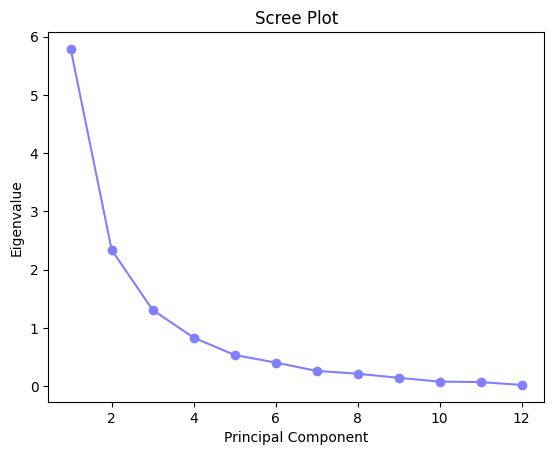

In [19]:
# plot scree plot
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', color='#8080ff')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

The scree plot also shows that the eigenvalue plot decreases sharply in the first to third principal components, then the eigenvalue plot levels off after the third principal component. Therefore, 3 factors can be formed.

[0.48235109 0.19473348 0.10899673 0.06945252 0.04463776 0.03378839
 0.02191272 0.01780076 0.01202655 0.00657671 0.00589476 0.00182852]


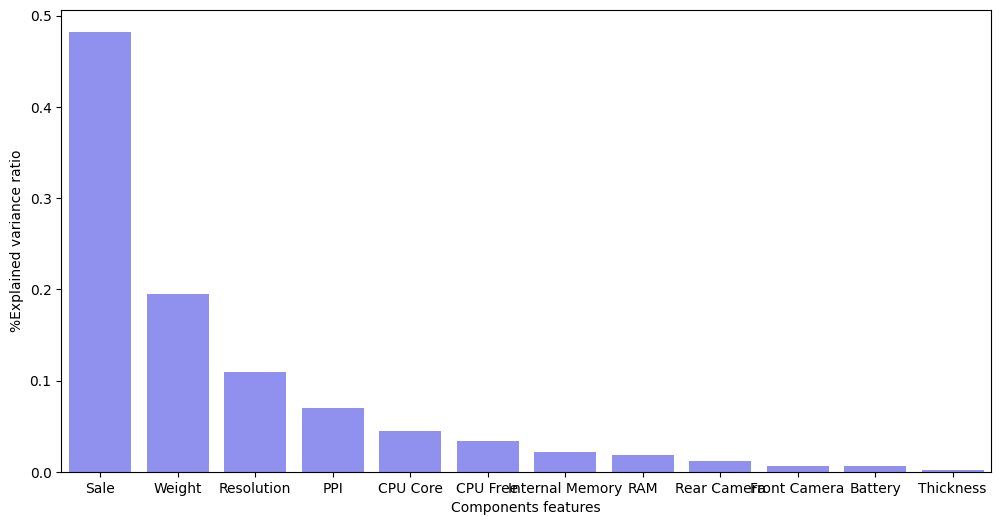

In [20]:
evr = pca.explained_variance_ratio_
print(evr)
features = ['Sale', 'Weight', 'Resolution', 'PPI', 'CPU Core', 'CPU Free', 'Internal Memory',
               'RAM', 'Rear Camera', 'Front Camera', 'Battery', 'Thickness']

# plot the EVR using matplotlib pyplot
plt.figure(figsize=(12,6))
sns.barplot(x=np.array(features), y=evr, color='#8080ff')
plt.xlabel("Components features")
plt.ylabel("%Explained variance ratio")
plt.show()

[ 5.78821304  8.12501475  9.43297555 10.26640583 10.802059   11.20751963
 11.47047226 11.68408139 11.82840001 11.90732056 11.97805774 12.        ]


<function matplotlib.pyplot.show(close=None, block=None)>

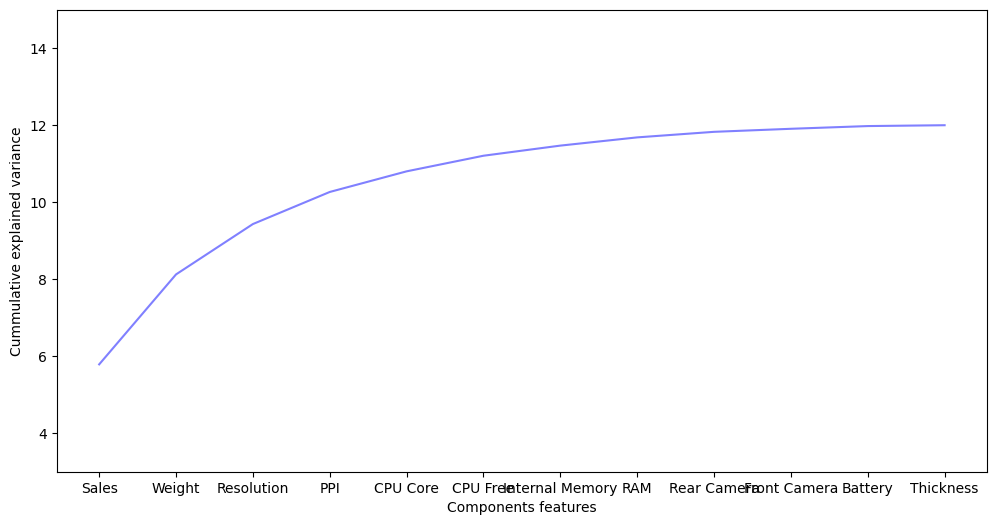

In [21]:
evc = np.cumsum(pca.explained_variance_)
print(evc)

features = ['Sales', 'Weight', 'Resolution', 'PPI', 'CPU Core', 'CPU Free', 'Internal Memory',
            'RAM', 'Rear Camera', 'Front Camera', 'Battery', 'Thickness']

plt.figure(figsize=(12,6))
sns.lineplot(x=np.array(features), y=evc, color='#8080ff')
plt.xlabel("Components features")
plt.ylabel("Cummulative explained variance")
plt.ylim(3,15)
plt.show

In [22]:
loadings = pd.DataFrame(pca.components_.T[:,:3], index=np.array(features), columns=names[:3])
loadings

,PC1,PC2,PC3
Sales,-0.143882,-0.220395,0.593220
Weight,-0.151133,0.573895,0.220681
Resolution,-0.257204,0.492238,-0.000362
PPI,-0.321960,-0.249472,-0.123332
CPU Core,-0.303939,0.037176,-0.345398
CPU Free,-0.324013,0.011261,-0.224580
Internal Memory,-0.299771,-0.183991,0.405916
RAM,-0.361646,-0.153266,0.187476
Rear Camera,-0.321120,-0.221529,-0.200690
Front Camera,-0.291895,-0.218183,0.085128


The loading values or component matrix shows the correlation coefficient between each variable and the factors formed. In the output above, the component matrix values are displayed in columns PC1, PC2, and PC3. Column PC1 shows the relationship of each variable with the first factor, and so on.

**VARIMAX ORTHOGONAL**

In [23]:
X = df1

# normalizing features
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

# fit factor analyzer with principal components and varimax rotation
fa = FactorAnalyzer(rotation="varimax", n_factors=3, method='principal')
fa.fit(X_norm)

# get the rotated factor pattern
loadings2 = pd.DataFrame(fa.loadings_, index=X_norm.columns, columns=[f"Factor{i+1}" for i in range(3)])
rotated_factor_pattern = loadings2[abs(loadings2) >= 0.4].dropna(how='all')

# display the results
rotated_factor_pattern

,Factor1,Factor2,Factor3
Sale,NaN,NaN,0.831200
Weight,NaN,0.981108,NaN
Resolution,NaN,0.919895,NaN
PPI,0.771267,NaN,0.409905
CPU Core,0.790082,NaN,NaN
CPU Freq,0.755816,NaN,NaN
Internal Memory,NaN,NaN,0.816386
RAM,0.606324,NaN,0.671492
Rear Camera,0.812025,NaN,NaN
Front Camera,0.565073,NaN,0.542527


We simplify the matrix components with a varimax rotation approach. The maximum possible simplification is achieved if there are only 1s and 0s in one column.

To ensure that a variable is included in the factor group, it can be determined by looking at the largest correlation coefficient between the variable and the factors formed, which can be seen in the rotated component matrix values.

From the results obtained, each factor is determined from the following variables.
1. Factor 1, determined from the variables PPI, CPU Core, CPU Freq, Rear Camera, Front Camera, and Thickness.
2. Factor 2, determined from the variables Weight, Resolution, and Battery.
3. Factor 3, determined from the Sale, Internal Memory and RAM variables.

In [24]:
print(pd.DataFrame(fa.get_communalities(),index=df1.columns,columns=['Communalities']))

                 Communalities
Sale                  0.693620
Weight                0.965547
Resolution            0.949115
PPI                   0.765327
CPU Core              0.693977
CPU Freq              0.673938
Internal Memory       0.814760
RAM                   0.857892
Rear Camera           0.764229
Front Camera          0.613890
Battery               0.916818
Thickness             0.723864


All communalities values exceed 0.5, it means all variables can be used to explain factors.

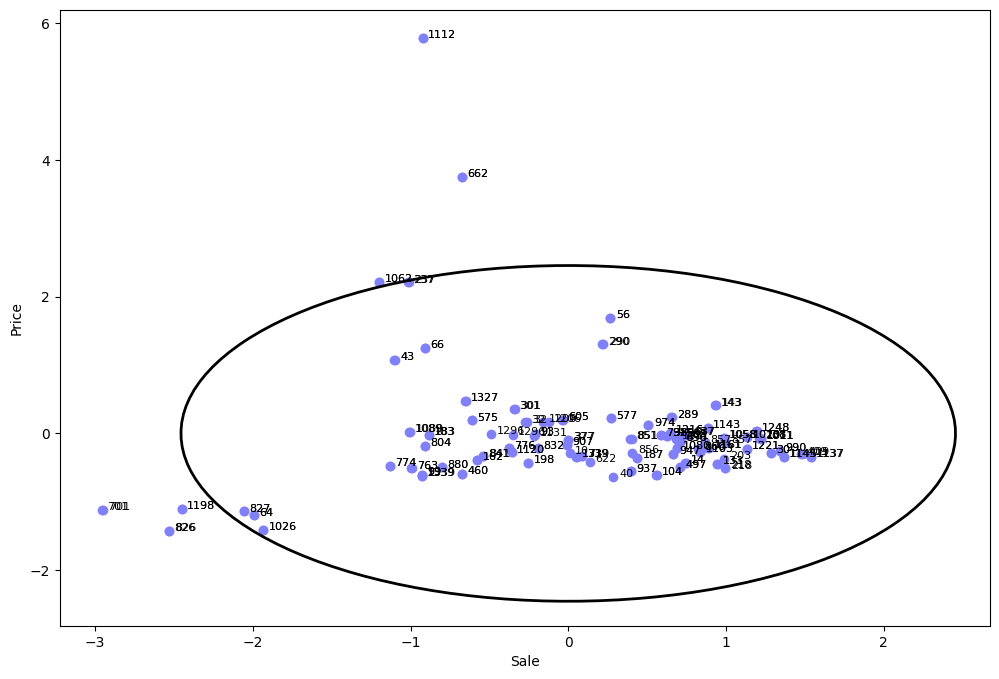

In [25]:
from matplotlib.patches import Ellipse

loadings = fa.loadings_

# Get the rotated factors
factors = fa.transform(X_norm)

# Create scatter plot
fig, ax = plt.subplots(figsize=(12, 8))
sc = ax.scatter(factors[:,0], factors[:,1], c='#8080ff')

# Add anime titles to the points
for i, title in enumerate(df['Product_id']):
    ax.annotate(title, (factors[i,0], factors[i,1]), xytext=(4,0), textcoords='offset points', fontsize=8)

# Add axis labels
ax.set_xlabel('Sale')
ax.set_ylabel('Price')

# Add 95% ellipse
mean = np.mean(factors[:,0:2], axis=0)
cov = np.cov(factors[:,0], factors[:,1])
w, v = np.linalg.eig(cov)
theta = np.degrees(np.arctan2(*v[:,0][::-1]))
width, height = 2 * np.sqrt(w * 5.991)
ellipse = Ellipse(xy=mean, width=width, height=height, angle=theta, edgecolor='black', fc='None', lw=2)
ax.add_patch(ellipse)

plt.show()